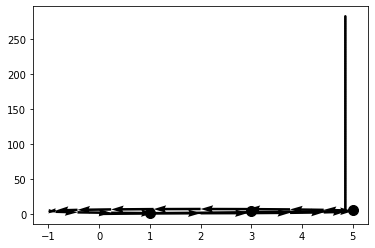

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Q-learning algorithm for action selection
class QLearning:
    def __init__(self, num_actions):
        self.num_actions = num_actions
        self.Q = np.zeros((num_actions,))

    def select_action(self, state):
        return np.argmax(self.Q)

    def update(self, action, reward, alpha, gamma):
        td_target = reward + gamma * np.max(self.Q)
        td_error = td_target - self.Q[action]
        self.Q[action] += alpha * td_error

# Simulated robot movement and sensing
def move_robot(current_pose, movement):
    new_pose = current_pose + movement
    return new_pose

def take_measurement(robot_pose):
    # Simulate sensor measurement
    measurement = np.random.normal(robot_pose, 0.1)
    return measurement

def main():
    robot_pose = np.array([0, 0])
    global_path = np.array([[1, 2], [3, 4], [5, 6]])

    num_actions = 4  # Example: up, down, left, right
    q_learning = QLearning(num_actions)
    alpha = 0.1  # Learning rate
    gamma = 0.9  # Discount factor

    plt.scatter(global_path[:, 0], global_path[:, 1], color='black', s=100)  # Plot the global path as black dots

    max_attempts = 100  # Limit the number of attempts

    curve_points = []
    num_points = 20  # Number of points on the circular path

    # Generate circular path points
    for i in range(num_points):
        x = 3 * np.cos(2 * np.pi * i / num_points) + 2  # Equation for x-coordinate of a circle
        y = 3 * np.sin(2 * np.pi * i / num_points) + 4  # Equation for y-coordinate of a circle
        curve_points.append([x, y])

    movements = {0: np.array([0, 1]), 1: np.array([0, -1]), 2: np.array([-1, 0]), 3: np.array([1, 0])}

    arrows = []  # Store arrows for plotting the path

    for destination in global_path:
        attempts = 0
        while not np.array_equal(robot_pose, destination) and attempts < max_attempts:
            if len(curve_points) > 0:
                action = q_learning.select_action(0)  # Select an action based on Q-learning

                target_point = np.array(curve_points[0])
                movement = target_point - robot_pose

                robot_pose = move_robot(robot_pose, movement)

                arrows.append(np.array([robot_pose - movement, robot_pose]))

                if np.array_equal(robot_pose, target_point):
                    curve_points.pop(0)

            else:
                action = q_learning.select_action(0)  # Select an action based on Q-learning

                movement = movements[action]  # Get movement corresponding to the action

                robot_pose = move_robot(robot_pose, movement)

                arrows.append(np.array([robot_pose - movement, robot_pose]))

            attempts += 1

    for arrow in arrows:
        plt.quiver(arrow[0][0], arrow[0][1], arrow[1][0] - arrow[0][0], arrow[1][1] - arrow[0][1], scale_units='xy', angles='xy', scale=1)

    plt.show()  # Display the map with the robot's path

if __name__ == "__main__":
    main()
